# Natural Language Processing(NLP) - Amazon Reviews

## In this project we are going to perform Natural Language Processing. We are going to use CountVectorizer( Bag Of Words) Technique to predict Positive and Negative reviews.

## Problem Statement:

#### To verify the Sentiment Analysis to determine whether the data is positive or negative

In [1]:
# Import the Libraries
import pandas as pd
# Import the nltk function 
import nltk
# Import the string 
import string
import seaborn as sns 

In [2]:
# Read the file 

amazon = pd.read_csv(r"D:\sushma\data sets\amazonreviews.tsv", sep='\t')

In [3]:
# Check the head function 

amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [5]:
# Check the nulls 

amazon.isnull().sum()

label     0
review    0
dtype: int64

In [6]:
# Assign the categorical data into numerical form 

amazon.label.replace({"pos":0, "neg":1}, inplace=True)

In [7]:
amazon.head()

,label,review
0,0,Stuning even for the non-gamer: This sound tra...
1,0,The best soundtrack ever to anything.: I'm rea...
2,0,Amazing!: This soundtrack is my favorite music...
3,0,Excellent Soundtrack: I truly like this soundt...
4,0,"Remember, Pull Your Jaw Off The Floor After He..."


In [8]:
# Convert all the data into lower case of english alphabate
# As python is case sensitive, we are converting all those data into lower case
# Similarly, we can also convert it into Upper case also.

amazon.review = amazon.review.str.lower()

In [9]:
amazon["Length"] = amazon.review.apply(len)

In [10]:
# Check the head function.

amazon.head()

,label,review,Length
0,0,stuning even for the non-gamer: this sound tra...,426
1,0,the best soundtrack ever to anything.: i'm rea...,509
2,0,amazing!: this soundtrack is my favorite music...,760
3,0,excellent soundtrack: i truly like this soundt...,743
4,0,"remember, pull your jaw off the floor after he...",481


In [11]:
nltk.download('stopwords')  #True download stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# from nltk library import the stopwords

from nltk.corpus import stopwords

In [13]:
# Check for all the stopwords from enlgish directory

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# Length of stopwrods from english directory

len(stopwords.words("english"))

179

In [15]:
# Check the punctuations from the strings

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# Define a function to remove the punctuation and stopwords by selecting those them specially. 
# Where text_process is the use defined function 


def text_process(mess):
    """## a docstring
    1.remove the stopwords
    2.remove the punctuation
    3.return the list of clean textwords
    
    """
    nonpunc = [char for char in mess if char not in string.punctuation]
    nonpunc = "".join(nonpunc)
    
    return[ word for word in nonpunc.split() if word not in stopwords.words("english")]

##### Above is the user defined function which will remove the punctuations and stopwords from the data. We will apply this function and get our data cleaned

In [17]:
# In this step we are applying the text_process user defined function on the 'review' column 
# And having the data which contains the words from corpus except stopwords and punctuation 

amazon['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

#### What is the maximum and minimum lengths of the message? and which are those message?

In [18]:
amazon["Length"].max()

1015

In [19]:
amazon[amazon["Length"] == amazon["Length"].max()]["review"].iloc[0]

"dry and humorless: i totally disagree with the reviewer from hongkong who must have been writing about some other book when she portrayed infatuation as funny and sexy, with witty dialogues and hot passion. as it happens, most of the book is devoted to a character analysis of judith. in a nut shell, judith knows that she is an ugly duckling with incredible brain power. we don't see any real attraction developing between luke and judith until the last quarter of the book. and then when it does, the author's analysis of judith is vindicated for she is accepted by luke because of her brainy self rather than her looks. the most tragicomedical line of the book must be when luke agrees with judith that she is not beautiful. disappointingly for me, just when i'm getting interested in the story in the last quarter of the book, the plot reaches its climax and comes to an end. the story is dry and tends to drag on. i must say that the writing is good as can be expected from charlotte lamb. i ga

In [20]:
amazon["Length"].min()

101

In [21]:
amazon[amazon["Length"] == amazon["Length"].min()]["review"].iloc[0]

'dont know!: the program looks fun but the software i recieved was corupt it wont load on any machine.'

<AxesSubplot:xlabel='label', ylabel='Length'>

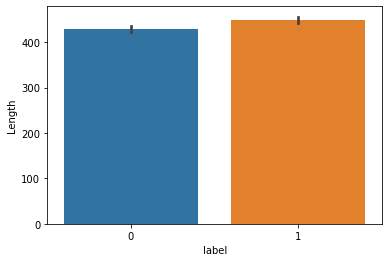

In [22]:
sns.barplot(x = "label", y = "Length", data = amazon)

#### The above bar plot gives us the idea of distribution of Positive and Negative reviews

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

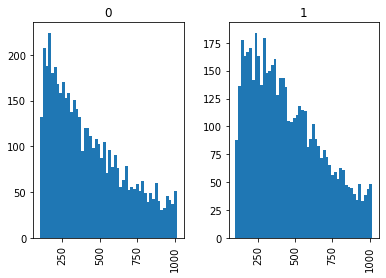

In [23]:
amazon.hist(column= "Length",by="label", bins = 50)

### Here with the help of bar plots we can see that the length of Positive and Negative messages is almost equally concentrated.

In [24]:
# From this feature_extraction import Countvectorizer
# Countvectorizer will count that the particular word appears for how many times 

from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# We are counting words form text_process user defined fucntion from review columns 

bow_transfer = CountVectorizer(analyzer= text_process).fit(amazon["review"])

In [26]:
# We above function we are checking the vocabulary by counting that how many times it appears

bow_transfer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [27]:
# Length of the vocabulary
# there are 40040 unique words 
# SO in our TDM there are 40040 columns and  10000 rows

len(bow_transfer.vocabulary_)

40040

#### As we can see, there are 40040 unique words. We will transform our data into sparse matrics

In [28]:
# We are just transforming the bow_tranfer into amozon_review by using transform
# Convert the TDM (term document matrix)

review_bow = bow_transfer.transform(amazon.review)

In [29]:
# Check the shape function 

review_bow.shape

(10000, 40040)

#### Now we are ready to split the data and apply Naive Bayes algorithm on it.

In [30]:
# As we run the type fucntion over it, it will execute the sparse.matrix
# Sparse. matrix = (which contains only few number  mo numierical data)

type(review_bow)

scipy.sparse.csr.csr_matrix

## Sampling 

In [31]:
# Split the term in train and test


from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(review_bow , amazon.label, test_size = 0.2 , random_state = 123)

In [32]:
# Input the NB algorithm
# We can also use DT , RF , Logistic Regression, etc. 

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [33]:
# Fit the model over train data 

NB.fit(x_train, y_train)

MultinomialNB()

## Prediction

In [34]:
pred_amazon = NB.predict(x_test)

In [35]:
#Import the confusion matrix from metrics

from sklearn.metrics import confusion_matrix

In [36]:
# Check the confusion matrix 

tab_amazon = confusion_matrix(pred_amazon, y_test)
tab_amazon

array([[768, 148],
       [203, 881]], dtype=int64)

In [37]:
# Check the accuracy for the formed model 

Acc = tab_amazon.diagonal().sum() / tab_amazon.sum() * 100
Acc

82.45

### Our model has accuracy of 82.45 %

### ------------------Thank You----------------